In [1]:
# Block 1: Imports and Load Data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='liac-arff')
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# Use a subset for faster execution
n_samples = 5000
indices = np.random.choice(X.shape[0], n_samples, replace=False)
X_subset = X[indices]
y_subset = y[indices]

In [2]:
# Block 2: Preprocess and Apply PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

# Reduce dimensionality for easier GMM fitting and visualization
n_components_pca = 50 # Choose number of PCA components
pca = PCA(n_components=n_components_pca, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"Original features: {X_scaled.shape[1]}")
print(f"PCA reduced features: {X_pca.shape[1]}")
print(f"Explained variance ratio by {n_components_pca} components: {np.sum(pca.explained_variance_ratio_):.4f}")

Original features: 784
PCA reduced features: 50
Explained variance ratio by 50 components: 0.6084


In [3]:
# Block 3: Fit Gaussian Mixture Model using EM
# We expect 10 clusters (digits 0-9)
n_clusters = 10
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42, n_init=5)
# n_init > 1 helps avoid poor local optima

print("Fitting GMM...")
gmm.fit(X_pca)
print("GMM fitting complete.")

cluster_assignments = gmm.predict(X_pca)
cluster_probs = gmm.predict_proba(X_pca)

Fitting GMM...
GMM fitting complete.


In [4]:
# Block 4: Evaluate Clustering
ari_score = adjusted_rand_score(y_subset, cluster_assignments)
silhouette = silhouette_score(X_pca, cluster_assignments) # Can be slow

print(f"\nClustering Evaluation:")
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")


Clustering Evaluation:
Adjusted Rand Index (ARI): 0.3163
Silhouette Score: 0.0169


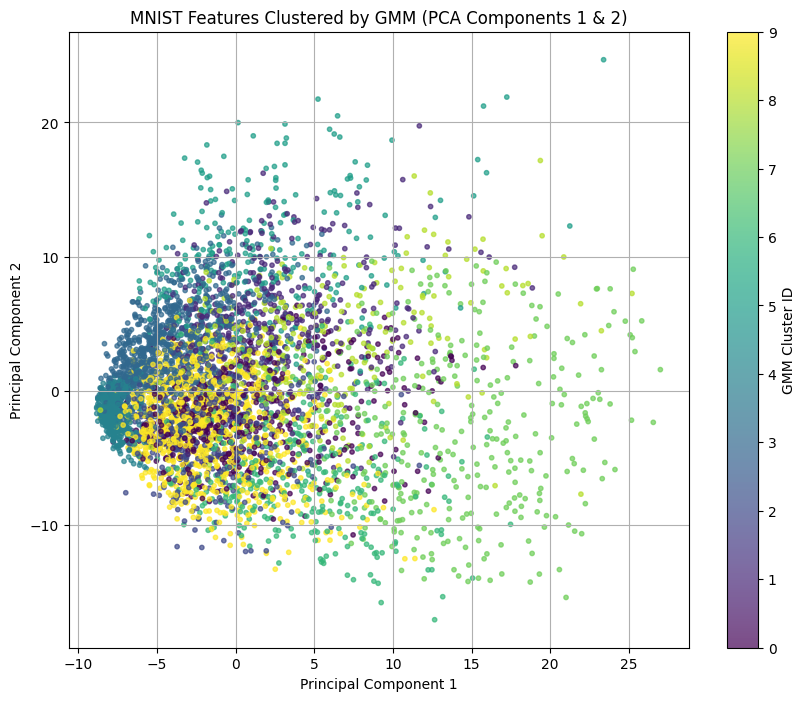

In [5]:
# Block 5: Visualize Clusters (using first 2 PCA components)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_assignments, cmap='viridis', s=10, alpha=0.7)
plt.title('MNIST Features Clustered by GMM (PCA Components 1 & 2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='GMM Cluster ID')
plt.grid(True)
plt.show()